## Define dcreasing regimes for N' and N'' (belly and no-belly)

$C(z)=C_0 + C'(z-z_0) + C''(z-z_0)^2$, where $N_0$ is the concentration at $z_0$. I will start with $z_0=H_s$, so $C_0$ is a reference concentration at shelf break depth.
   

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sympy as sym
import seaborn as sns
sym.init_printing() # enable fancy printing

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Set appearance options seaborn
sns.set_style('white')
sns.set_context('notebook')

In [3]:
C1,C2,z,Co,Hs,tau,Z = sym.symbols('C1,C2,z,Co,Hs,tau, Z')
func = Co + C1*(z-Hs) + C2*((z-Hs)**2)


In [4]:
func

### What should be the value of $\hat{C''}$ to avoid maxima, minima or inflectio points within Hd? 

i.e. Profiles with 'no bellies' (max, mins or inflection points)

There are bellies wherever 

$d\hat{C}/dz=\hat{C'}+2\hat{C''}(z-Hs)=0$. (1)

I don't want these points (I'll call them $z_{belly}$) to be within my profile ($0\le z \le Hd$), so I have the condition:

  $0 \ge z_{belly}$ or $z_belly \le 400$ (2),

but solving (1) for $z_{belly}$ gives,

$z_{belly}=\frac{-\hat{C'}}{2\hat{C''}}+Hs$ (3). 

The inequalities (2) and (3) give:

(4) $\frac{\hat{C'}}{2Hs}\ge {\hat{C''}}$ and (5) $\frac{\hat{C'}}{2(Hs-Hd)}\le {\hat{C''}}$, 

for a given $ 0>\hat{C'}$ (since I want decreasing profiles)

The region that satisfies conditions (4) and (5) is the triangle plotted below. Also, these hold for the dimensional parameters $C'$ and $C''$, where $  0 > C'$





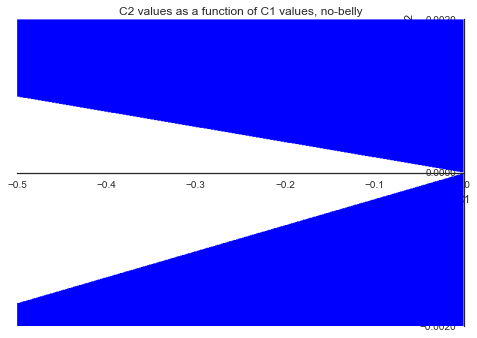

In [16]:
p2 = sym.plot_implicit(sym.Or(C1/(2*(147.5-400)) < C2,C1/(2*147.5) > C2),(C1,-0.5,0),(C2,-0.002,0.002),
                      title='C2 values as a function of C1 values, no-belly')


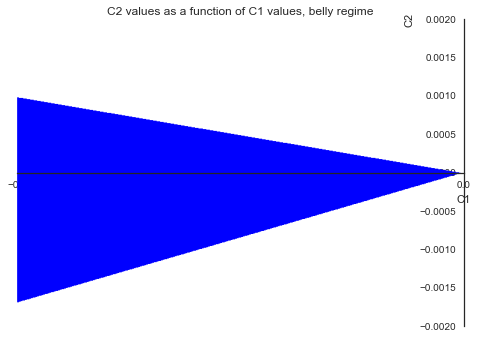

In [15]:
p2 = sym.plot_implicit(sym.And(C1/(2*(147.5-400)) > C2,C1/(2*147.5) < C2),(C1,-0.5,0),(C2,-0.002,0.002),
                      title='C2 values as a function of C1 values, belly regime')


Let's see if it works...

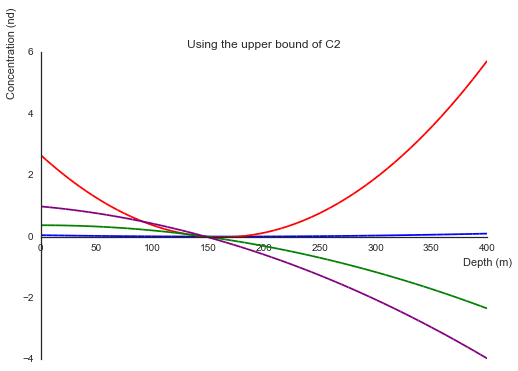

In [18]:
func = 0 + C1*(z-Hs) + C2*((z-Hs)**2)
hand = sym.plot(func.subs({C1:-0.00005,Hs:147.5,C2:0.0005/(2*147.5)}),
               func.subs({C1:-0.003,Hs:147.5,C2:0.03/(2*147.5)}),
               func.subs({C1:-0.005,Hs:147.5,C2:-0.005/(2*147.5)}),
               func.subs({C1:-0.01,Hs:147.5,C2:-0.0067/(2*147.5)}),(z, 0, 400),
               xlabel='Depth (m)',
               ylabel='Concentration (nd)',
               title='Using the upper bound of C2',
               show=False)
hand[1].line_color='r'
hand[2].line_color='g'
hand[3].line_color='purple'

hand.show()

## $\tau_v$ as a function of N' and N''

$$\frac{\tau}{Z}=\frac{\delta^2_vN}{\delta_vN}=Z\frac{\delta^2_vN}{\delta_vN}\rvert_{z=Hs}=\frac{2N''}{N'}$$

We have some bounds for N' and N'': we imposed $0\le N'$ and $N'/2Hs\gt N''$ and $N''\lt N'/(2(Hs-400))$ to have a profile with a max, min or inflection point above 400 m.

Using these bounds, we can now bound the values of \tau_v/Z:

$$\frac{\tau}{Z}=\frac{2N''}{N'} \gt \frac{2N'}{2HsN'} = \frac{1}{Hs}$$

and

$$\frac{\tau}{Z}=\frac{2N''}{N'} \lt \frac{2N'}{2N'(Hs-Hd)} = \frac{1}{(Hs-Hd)}$$

These bounds do not depend on N' or N'', only on Hs.

So,

$$ \frac{1}{Hs-Hd} \gt \frac{\tau}{Z} \gt \frac{1}{Hs}$$

Hs=0 and Hd are asymptotes, but that is fine. If Hs = 0 it means you don't even have a shelf and if Hs=400 m you probbaly care about not having bellies deeper than that, so 400 m wouldn't even be an asymptote in the first place.

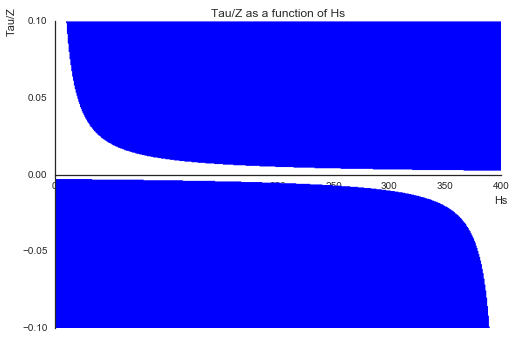

In [19]:
p2 = sym.plot_implicit(sym.Or(1/Hs < tau, 1/(Hs-400)> tau), (Hs, 0, 400),(tau,-0.1,0.1),
                      title='Tau/Z as a function of Hs',
                      ylabel='Tau/Z')


In the idealized bathymetry Hs=147.5 m, so the bounds are: $-0.004  \gt \frac{\tau}{Z} or  \frac{\tau}{Z}\gt 0.007$, units are m$^{-1}$. If I say that Z can be between 0 and 100 m then the values of $\tau_v$ can be:

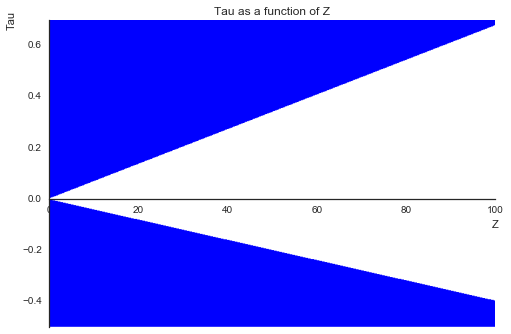

In [20]:
p2 = sym.plot_implicit(sym.Or(Z/147.5 < tau, Z/(147.5-400)> tau), (Z, 0, 100),(tau,-0.5,0.7),
                      title='Tau as a function of Z',
                      ylabel='Tau')
